<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.299487,86.677676,61.078229,63.489737,0.287092,307.832222,272.129931,35.702291
1,0.0,1.0,49.944543,72.394400,69.229255,63.994046,-497.592791,-232.030545,269.563079,-501.593624
2,0.0,2.0,80.429545,47.162515,74.970176,83.110203,121.043538,416.715977,272.392204,144.323773
3,0.0,3.0,41.357068,51.183632,43.801225,79.470067,566.016236,791.828229,260.340487,531.487742
4,0.0,4.0,62.511618,39.792596,32.844864,31.241732,-281.263445,-104.872635,213.873428,-318.746062
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.431274,53.057875,79.737345,63.509698,-262.177703,12.558490,223.368532,-210.810043
249996,999.0,246.0,40.601738,76.864597,49.762277,26.255731,-414.017829,-210.533486,272.610915,-483.144401
249997,999.0,247.0,77.059062,27.122230,82.908516,37.800684,-154.621297,80.269195,191.750096,-111.480901
249998,999.0,248.0,40.009161,48.207468,79.306751,91.414117,22.381139,291.318636,224.660608,66.658028


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    86.299487  86.677676  61.078229  63.489737    0.287092   
      1.0    49.944543  72.394400  69.229255  63.994046 -497.592791   
      2.0    80.429545  47.162515  74.970176  83.110203  121.043538   
      3.0    41.357068  51.183632  43.801225  79.470067  566.016236   
      4.0    62.511618  39.792596  32.844864  31.241732 -281.263445   
...                ...        ...        ...        ...         ...   
999.0 245.0  68.431274  53.057875  79.737345  63.509698 -262.177703   
      246.0  40.601738  76.864597  49.762277  26.255731 -414.017829   
      247.0  77.059062  27.122230  82.908516  37.800684 -154.621297   
      248.0  40.009161  48.207468  79.306751  91.414117   22.381139   
      249.0  99.296776  20.435576  25.347546  25.157646 -126.246391   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    307.832222  272.129931   35.702291  
      1.0   -232.030545  269.563079 -501.593624  
      2.0    416.715977  272.392204  144.323773  
      3.0    791.828229  260.340487  531.487742  
      4.0   -104.872635  213.873428 -318.746062  
...                 ...         ...         ...  
999.0 245.0   12.558490  223.368532 -210.810043  
      246.0 -210.533486  272.610915 -483.144401  
      247.0   80.269195  191.750096 -111.480901  
      248.0  291.318636  224.660608   66.658028  
      249.0   53.991154  173.519333 -119.528179  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    86.299487  86.677676  61.078229  63.489737    0.287092   
      1.0    49.944543  72.394400  69.229255  63.994046 -497.592791   
      2.0    80.429545  47.162515  74.970176  83.110203  121.043538   
      3.0    41.357068  51.183632  43.801225  79.470067  566.016236   
      4.0    62.511618  39.792596  32.844864  31.241732 -281.263445   
...                ...        ...        ...        ...         ...   
999.0 245.0  68.431274  53.057875  79.737345  63.509698 -262.177703   
      246.0  40.601738  76.864597  49.762277  26.255731 -414.017829   
      247.0  77.059062  27.122230  82.908516  37.800684 -154.621297   
      248.0  40.009161  48.207468  79.306751  91.414117   22.381139   
      249.0  99.296776  20.435576  25.347546  25.157646 -126.246391   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    307.832222  272.129931   35.702291  
      1.0   -232.030545  269.563079 -501.593624  
      2.0    416.715977  272.392204  144.323773  
      3.0    791.828229  260.340487  531.487742  
      4.0   -104.872635  213.873428 -318.746062  
...                 ...         ...         ...  
999.0 245.0   12.558490  223.368532 -210.810043  
      246.0 -210.533486  272.610915 -483.144401  
      247.0   80.269195  191.750096 -111.480901  
      248.0  291.318636  224.660608   66.658028  
      249.0   53.991154  173.519333 -119.528179  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,86.299487,86.677676,61.078229,63.489737,0.287092,307.832222,272.129931,35.702291
1,0.0,1.0,49.944543,72.394400,69.229255,63.994046,-497.592791,-232.030545,269.563079,-501.593624
2,0.0,2.0,80.429545,47.162515,74.970176,83.110203,121.043538,416.715977,272.392204,144.323773
3,0.0,3.0,41.357068,51.183632,43.801225,79.470067,566.016236,791.828229,260.340487,531.487742
4,0.0,4.0,62.511618,39.792596,32.844864,31.241732,-281.263445,-104.872635,213.873428,-318.746062
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.431274,53.057875,79.737345,63.509698,-262.177703,12.558490,223.368532,-210.810043
249996,999.0,246.0,40.601738,76.864597,49.762277,26.255731,-414.017829,-210.533486,272.610915,-483.144401
249997,999.0,247.0,77.059062,27.122230,82.908516,37.800684,-154.621297,80.269195,191.750096,-111.480901
249998,999.0,248.0,40.009161,48.207468,79.306751,91.414117,22.381139,291.318636,224.660608,66.658028


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    86.299487  86.677676  61.078229  63.489737    0.287092   
      1.0    49.944543  72.394400  69.229255  63.994046 -497.592791   
      2.0    80.429545  47.162515  74.970176  83.110203  121.043538   
      3.0    41.357068  51.183632  43.801225  79.470067  566.016236   
      4.0    62.511618  39.792596  32.844864  31.241732 -281.263445   
...                ...        ...        ...        ...         ...   
999.0 245.0  68.431274  53.057875  79.737345  63.509698 -262.177703   
      246.0  40.601738  76.864597  49.762277  26.255731 -414.017829   
      247.0  77.059062  27.122230  82.908516  37.800684 -154.621297   
      248.0  40.009161  48.207468  79.306751  91.414117   22.381139   
      249.0  99.296776  20.435576  25.347546  25.157646 -126.246391   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    307.832222  272.129931   35.702291  
      1.0   -232.030545  269.563079 -501.593624  
      2.0    416.715977  272.392204  144.323773  
      3.0    791.828229  260.340487  531.487742  
      4.0   -104.872635  213.873428 -318.746062  
...                 ...         ...         ...  
999.0 245.0   12.558490  223.368532 -210.810043  
      246.0 -210.533486  272.610915 -483.144401  
      247.0   80.269195  191.750096 -111.480901  
      248.0  291.318636  224.660608   66.658028  
      249.0   53.991154  173.519333 -119.528179  

[250000 rows x 8 columns]

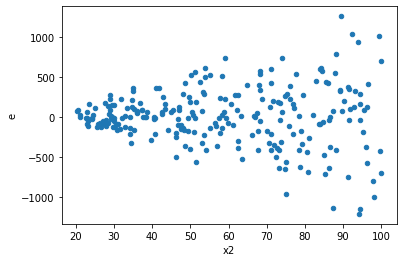

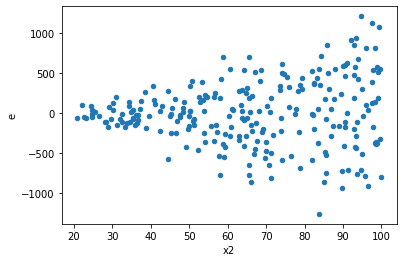

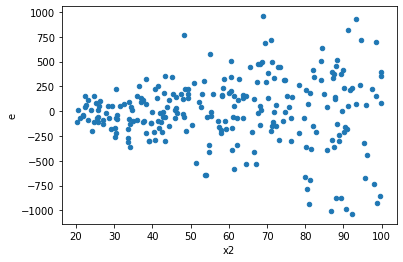

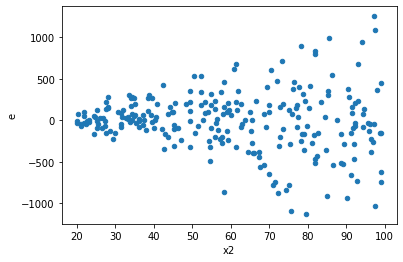

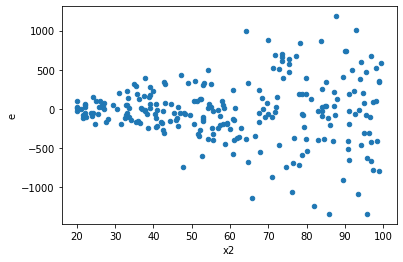

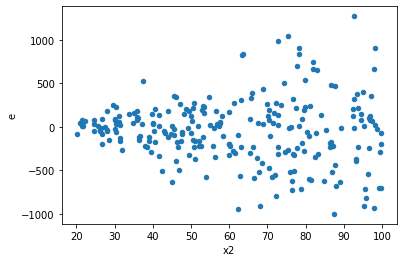

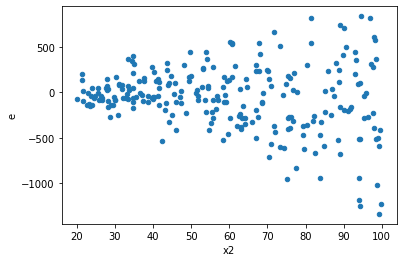

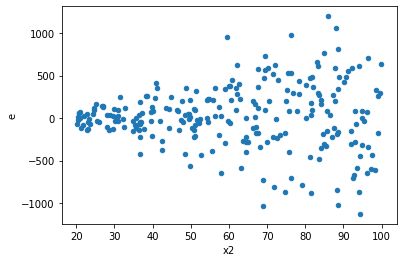

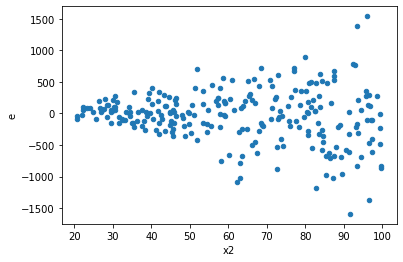

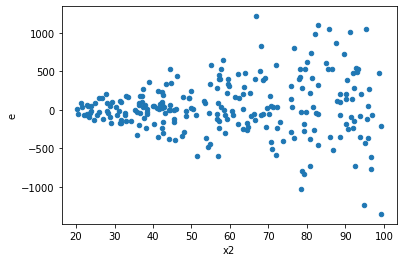

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,123.0,119.0,17034302.041169595,22711109.041363858,138490.26049731378,190849.65580978032,1.3780727621165976,0.07949756026671895,0.9602512198666405,0.039748780133359474,Reject001=1 : Homoscedasticity
2.0,128.0,114.0,12046304.27399819,14166588.834239198,94111.75214061086,124268.32310736139,1.3204336364038158,0.13025963888269687,0.9348701805586516,0.06512981944134844,Reject001=1 : Homoscedasticity
4.0,119.0,123.0,4246995.328260599,32667866.99106818,35689.03637193781,265592.41456152993,7.441848857829194,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,136.0,106.0,17667127.66892554,14450370.182487378,129905.35050680544,136324.2470045979,1.0494121025250318,0.7988638812062412,0.6005680593968794,0.3994319406031206,Reject001=1 : Homoscedasticity
7.0,105.0,137.0,12144154.93636854,21658885.365873214,115658.61844160514,158094.0537654979,1.3669024919687933,0.08601846437934224,0.9569907678103289,0.04300923218967112,Reject001=1 : Homoscedasticity
8.0,117.0,125.0,16216179.566346534,23816020.492078144,138599.82535338917,190528.16393662515,1.3746638096464685,0.08064115649709214,0.9596794217514539,0.04032057824854607,Reject001=1 : Homoscedasticity
15.0,124.0,118.0,15182550.288692081,20344991.037045546,122439.92168300066,172415.178280047,1.4081614551047594,0.06156302061710761,0.9692184896914462,0.030781510308553806,Reject001=1 : Homoscedasticity
16.0,138.0,104.0,11746229.713292452,15200247.401501646,85117.60661806124,146156.2250144389,1.717109195401481,0.004025248961154526,0.9979873755194227,0.002012624480577263,Reject001=0 : Heteroscedasticity
23.0,120.0,122.0,4723520.285099036,27508316.549579572,39362.669042491965,225478.0045047506,5.728219401518411,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,128.0,114.0,19236050.248509943,12054049.631024355,150281.64256648393,105737.27746512592,0.7035941027750493,0.053431514787010366,Reject001=1 : Homoscedasticity
1.0,123.0,119.0,17034302.041169595,22711109.041363858,138490.26049731378,190849.65580978032,1.3780727621165976,0.07949756026671895,Reject001=1 : Homoscedasticity
2.0,128.0,114.0,12046304.27399819,14166588.834239198,94111.75214061086,124268.32310736139,1.3204336364038158,0.13025963888269687,Reject001=1 : Homoscedasticity
3.0,114.0,128.0,14644791.844739428,15599961.152322201,128463.0863573634,121874.6965025172,0.948713750839534,0.775794872248725,Reject001=1 : Homoscedasticity
4.0,119.0,123.0,4246995.328260599,32667866.99106818,35689.03637193781,265592.41456152993,7.441848857829194,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,136.0,106.0,17667127.66892554,14450370.182487378,129905.35050680544,136324.2470045979,1.0494121025250318,0.7988638812062412,Reject001=1 : Homoscedasticity
6.0,137.0,105.0,19849087.61385077,10080186.966565179,144883.851195991,96001.78063395408,0.6626120153590347,0.023840158587551594,Reject001=1 : Homoscedasticity
7.0,105.0,137.0,12144154.93636854,21658885.365873214,115658.61844160514,158094.0537654979,1.3669024919687933,0.08601846437934224,Reject001=1 : Homoscedasticity
8.0,117.0,125.0,16216179.566346534,23816020.492078144,138599.82535338917,190528.16393662515,1.3746638096464685,0.08064115649709214,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      596
Reject001=0 : Heteroscedasticity    404
Name: Result_test, dtype: int64